In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn as sk
from sklearn.linear_model import LinearRegression
import sklearn.datasets

# Apprentissage Supervisé
*supervised learning*

## Introduction

Pour modéliser le problème d'apprentissage on se donne:
*  $\cal X$ est le domaine des données $x^1, x^2, x^3 \dots$
*  $\cal Y$ l'ensemble des étiquettes ou cibles $y^1, y^2, y^3 \dots$
On a vu qu'on cherche en général à prédire une fonction inconnue
$$y = f(x)$$
sur les données en fonction d'un échantillon
$${\cal D} = \{(x^1,y^1), (x^2,y^2), \dots, (x^m, y^m)\}$$

Si les $x^i$ de l'échantillon n'ont aucune régularité il est impossible de prédire $f$ en général.

### exemple en dimension 0
On a vu (voir cours reg. linéaire 1) que les si données sont juste de la forme
$${\cal D} = \{y^1, y^2, \dots, y^m\},$$
correspondant par exemple aux âges d'étudiants en M2,
alors la valeur constante qui approxime le mieux ces données au sens des moindres carrés est la moyenne
$$\bar{y} = \frac{1}{m} \sum_{i=1}^m y^i$$

Exemple : ${\cal X} = [0,1]$ et $ f(x) = 1$ si $x \geq \frac{1}{2}$, $f(x)=0$ sinon  
(problème de classification)

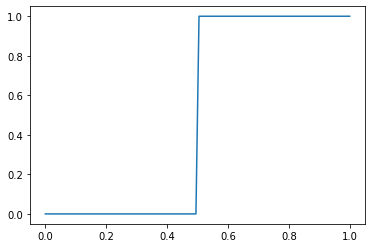

In [2]:
f = lambda x: 1 if x >= 0.5 else 0 ; f= np.vectorize(f)
Xlin= np.linspace(0,1,100)
plt.plot(Xlin,f(Xlin))
plt.show()


Si les $x^i$ de l'échantillon n'ont aucune régularité il est impossible de prédire $f$ en général.


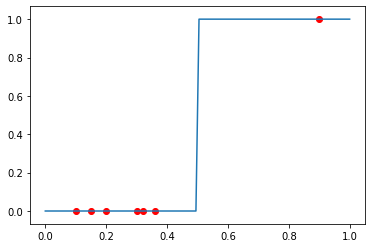

In [3]:
X = np.array([0.1,0.15,0.2,0.3,0.32,0.36,.9])
plt.plot(Xlin,f(Xlin))
plt.scatter(X,f(X),c='red')
plt.show()


Supposons que l'on cherche la fonction qui approxime au mieux ces données parmi les fonctions à seuil $g_w$ définies comme $f$ mais où $w$ est un seuil entre 0 et 1 autre que $1/2$ et que l'on sache que les données sont séparables aussi (donc que l'erreur 0 est possible).
Un algorithme simple serait de poser pour $w$ la valeur du plus petit $x^i$ des données dont le $y^i$
correspondant vaut 1.

Dans l'exemple ci-dessus on va poser $w=0.9$.
Supposons que l'ensemble des données test soit grand et réparti uniformément dans $[0,1]$.
Si on tire maintenant un nouveau point au hasard uniformément dans $[0,1]$, quelle est la probabilité d'erreur  de notre prédiction ? 

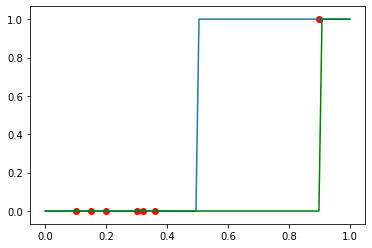

In [4]:
g = lambda x: 1 if x >= 0.9 else 0 ; g= np.vectorize(g)
plt.plot(Xlin,f(Xlin))
plt.plot(Xlin,g(Xlin),c='green')
plt.scatter(X,f(X),c='red')
plt.show()

L'erreur moyenne au test est (pour w fixé et les données d'apprentissage précédentes)
$$E_{x \sim unif}(g_w(x) \neq f(x))$$
$$ = (0.9 - 0.5) \times 1  = 0.4 $$

Notre but dans l'apprentissage est de minimiser cette quantité. Mais sans hypothèse de régularité supplémentaire sur les données, il n'y a pas de raison d'obtenir une erreur test petite. On fait donc l'hypothèse que **les données d'apprentissage sont obtenues par la même loi de probabilité que les données de test**, chaque $x^i$ sur le quel on fait l'apprentissage étant obtenu **de façon indépendante**.

Supposons que les données d'apprentissage $x^i$ soient aussi tirés uniformément dans $[0,1]$ de façon indépendante. Alors au final l'erreur de test $E_{test}$ vaut au moins $\delta$ si et seulement si aucun des $x^i$ n'appartient à $[\frac{1}{2}, \frac{1}{2} + \delta[$, ce qui ne se produit qu'avec une probabilité de 
$$(1-\delta)^n$$. Quel que soit delta on voit que la probabilité que l'erreur soit inférieure à $\delta$ tend vers 1 quand $n$ grandit.

## Modèlisation du problème d'apprentissage

Pour modéliser le problème d'apprentissage on se donne:
*  $\cal X$ est le domaine des données $x^1, x^2, x^3 \dots$
*  $\cal Y$ l'ensemble des étiquettes ou cibles $y^1, y^2, y^3 \dots$

On a vu qu'on cherche en général à prédire une fonction inconnue
$$y = f(x)$$
sur les données en fonction d'un échantillon
$${\cal D} = \{(x^1,y^1), (x^2,y^2), \dots, (x^m, y^m)\}$$
mais en fait il existe souvent un bruit aléatoire ou des variables inconnues qui font que plusieurs valeurs cibles $y$ sont possibles pour une même entrée $x$. On se donne donc :

*  $\mathbb P$ est une loi de probabilité sur $\cal X \times Y$  

$\mathbb P$ permet de déterminer de façon aléatoire un échantillon $(x,y)$. On supposera que l'échantillon des $m$ données sur lequel on veut faire l'apprentissage 
$${\cal D} = \{(x^1,y^1), (x^2,y^2), \dots, (x^m, y^m)\}$$
est constitué de **$m$ tirages indépendants** selon la probabilité $\mathbb P$ ; les données test sur lesquels on va mesure la qualité de l'apprentissage **seront aussi déterminées par $\mathbb P$**.

Remarque : on fait l'hypothèse que $\mathbb P$ existe mais cette distribution est inconnue, sinon le problème d'appretnissage serait résolu !

Le but de l'apprentissage supervisé est alors, étant donné un échantillon $\cal D$ de $m$ données d'apprentissage, d'approximer au mieux pour tout $x \in \cal X$ la distribution
$${\mathbb P}(y | x)$$
Pour obtenir une valeur fixe de prédiction à partir de ${\mathbb P}(y | x)$ on peut alors poser (en classification)
$$g(x) = \text{argmax}_y {\mathbb P}(y | x)$$
ou bien en régression si cela a un sens
$$g(x) = E(y | x)$$
de sorte que la distribution ${\mathbb P}(y | x)$ soit de la forme d'une variable aléatoire
$$g(x) + \text{bruit}$$
où le bruit est une variable aléatoire d'espérance nulle.

## L'algorithme d'apprentissage

Etant donné un problème formulé comme ci-dessus, un algorithme d'apprentissage est constitué :
*  d'un ensemble $\cal H$ de fonctions $h : \cal X \rightarrow \cal Y$ appelées **hypothèses**
*  d'un algorithme qui à partir de données $\cal D$ détermine une fonction particulière $g \in \cal H$ comme solution du problème d'apprentissage.

Pour évaluer la qualité de la solution on se donne une fonction de coût
$$\ell : \cal Y \times \cal Y \rightarrow \mathbb R^+$$
afin de mesurer l'écart $\ell(g(x),y)$ entre la prédiction $g(x)$ et la valeur cible $y$.  
(par exemple $\ell(y,y') = |y-y'|^2$ , coût quadratique, ou $\ell(y,y')={\mathbb 1}_{y \neq y'}$ coût 0-1).

On distingue l'erreur d'apprentissage ou erreur empirique
$$\text{Err_app} = \frac{1}{m} \sum_{i=1}^m \ell(g(x^i),y^i)$$
et l'erreur en sortie, ou erreur moyenne de test,
$$\text{Err_test} = E(\ell(g(x),y)$$
où le couple $(x,y)$ est déterminé par la loi $\mathbb P$.

L'erreur test peut être évaluée par le principe de Monte-Carlo, c'est à dire en tirant au hasard (toujours suivant $\cal P$) des nouvelles données de test et en calculant
 $$\frac{1}{m'} \sum_{i=1}^{m'} \ell(g(x'^i),y'^i)$$


## Le dilemme biais et variance
On peut démontrer formellement qu'il n'existe pas de classe d'hypothèse d'algorithme $A$ qui vont quelle que soit la distribution cachée $\mathbb P$ nous permettre d'obtenir  $\text{Err_test}$ faible. On est donc onligés de se restreindre à une classe d'hypothèses $\cal H$ pour l'apprentissage.  
Le choix de $\cal H$ et de l'algorithme dépend des a priori ou de la connaissance que l'on a sur les données.

La classe d'hypothèse $\cal H$ étant choisie, on ne pas faire une plus petite erreur test que
$$\inf_{h \in \cal H} E(\ell(h(x),y)$$
Une stratégie commune est de déterminer $h$ qui minimise l'erreur d'apprentissage
$$\inf_{h \in \cal H} \frac{1}{m} \sum_{i=1}^m \ell(h(x^i),y^i)$$
(par ex reg. linéaire) mais ce n'est pas toujours un choix optimal.

Un modèle $\cal H$ et algorithme étant fixé  

Le **biais** est la qualité d'approximation du modèle, par exemple
$$\inf_{h \in \cal H} E(\ell(h(x),y) = \inf_{h \in \cal H} \text{Err_test}(h)$$
Plus le modèle sera complexe, plus $\cal H$ est grand et plus le biais diminue.

La **variance** est l'incertitude sur le résultat produit par le modèle, sa sensibilité aux données de départ.
Avec un nombre de données fixé plus le modèle est complexe et plus la variance est grande et le résultat dépend fortement des données d'apprentissage spécifiques.

Si le modèle est trop complexe par rapport à la quantité de données disponibles ou la nature des données, on a un risque de **suradaptation (overfitting)** où l'erreur d'apprentissage sera faible mais l'erreur test sera grande.

Au contraire si le modèle n'est pas assez complexe alors le biais du modèle sera grand et l'erreur test ne pourra pas être moindre, il y a **sous-adaptation (underfitting)**.

<img src="images/overfitting.png" width=800>

<img src="images/overfitting2.png" width=800>

## Apprentissage et Test 
En pratique il est crucial quand on veut faire de l'apprentissage de garder une partie des données pour le test. Typiquement, on peut séparer les données $\cal D$ reçues en deux sous-ensembles  

*  $\cal D_{app}$ les données d'apprentissage, par ex 2/3 des données de $\cal D$ déterminées au hasard uniformément  
*  $\cal D_{test}$ le tiers restant des données. On utilise $\cal D_{test}$ pour avoir une estimation de l'erreur de test comme expliqué plus haut.




scikit learn a une fonction pour ça automatiquement :

In [21]:
import sklearn as sk
from sklearn.model_selection import train_test_split
iris = sk.datasets.load_iris()
print(len(iris['data']))

150


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(iris['data'], iris['target'], test_size=0.33, random_state=42)

In [18]:
print(X_train[:5])
print(len(X_train))

[[5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]
100


In [19]:
print(X_test[:5])
print(len(X_test))

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]
50


## Exercice
1. Générer des données bruitées D le long d'une droite.
2. Effectuer une regression linéaire sur D et évaluer l'erreur test (générer de nombreux points avec la même distribution et calculer l'erreur moyenne sur ces points).
3. Faire de même en augmentant la dimension des données à la dimensions 2, 3, jusqu'à au moins 20 et tracez une courbe de l'erreur test en fonction de la dimension (complexité du modèle).
4. Essayez de faire la même chose avec d'autres types de courbes bruitées (parabole, sinusoïde, etc.)
5. Suivez le même procédé avec un problème de classification en 2D pour obtenir une courbe de l'erreur de test en fonction de la complexité (par ex utiliser le pocket algorithm ou utilisez un classificateur "tout fait" de sklearn).